# Pie charts as an alternative to bar charts

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [2]:
from IPython.display import *
from importlib import reload
import item_distribution_utils as utils
# so that we reload modified `utils` every time we "Run All" the cells
utils = reload(utils)

## A. Audience
In this excercise, our audience is a everyone who knows what a content management system is. We want to show off the prevalence of WordPress

In [3]:
tbl_cms = utils.get_w3_cms_distribution()
tbl_cms.head()

,of_total,of_cms
what,,
3dcart,NaN,0.1
Adobe Dreamweaver,0.4,0.8
Adobe Experience Manager,0.1,0.1
Adobe GoLive,NaN,0.1
Adobe Muse,0.2,0.4


## B. Build

In [4]:
tbl_cms = tbl_cms.fillna(0)
tbl_cms

,of_total,of_cms
what,,
3dcart,0.0,0.1
Adobe Dreamweaver,0.4,0.8
Adobe Experience Manager,0.1,0.1
Adobe GoLive,0.0,0.1
Adobe Muse,0.2,0.4
Bigcommerce,0.2,0.4
Bitrix,0.7,1.2
Blogger,0.8,1.5
Business Catalyst,0.1,0.1


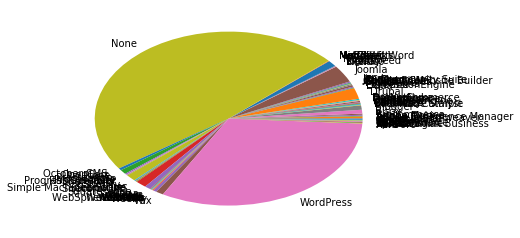

In [5]:
fig, ax = plt.subplots()
ax.pie(
    x=tbl_cms.of_total,
    labels=tbl_cms.index
)
None

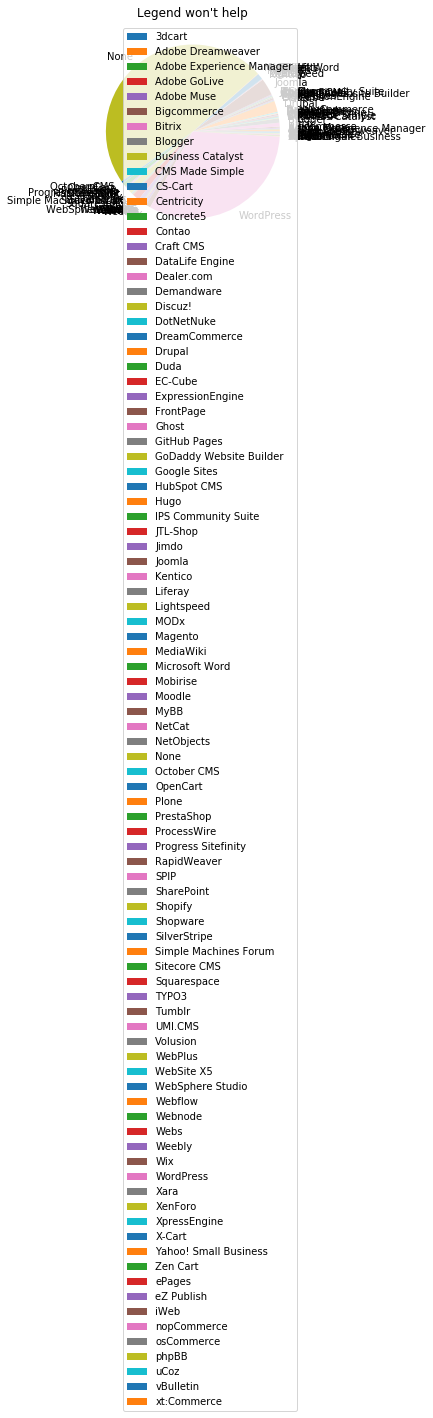

In [6]:
fig, ax = plt.subplots()
ax.set_aspect(1.0)  #!<----------------------------------
ax.pie(
    x=tbl_cms.of_total,
    labels=tbl_cms.index
)
ax.legend()
ax.set_title("Legend won't help")
None

The usual solution in this case would be to use a bar chart

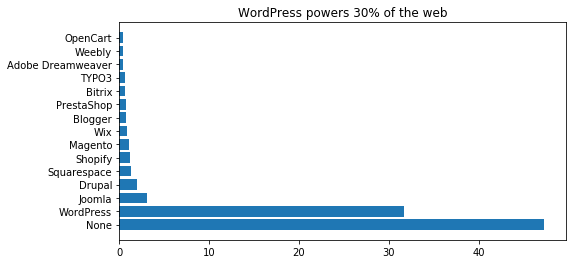

In [7]:
tbl_shortened = tbl_cms.sort_values('of_total', ascending=False).head(15)
fig, ax = plt.subplots(figsize=(8, 4))
y = list(range(len(tbl_shortened)))
ax.barh(
    y,
    tbl_shortened.of_total,
)
ax.set_yticks(y)
labels = tbl_shortened.index
ax.set_yticklabels(labels, ha='right')
ax.set_title('WordPress powers 30% of the web')
None

## C. Conclusion
What does the graph mean? "What" vs. "So what"

Let's see what we can do with pie charts.

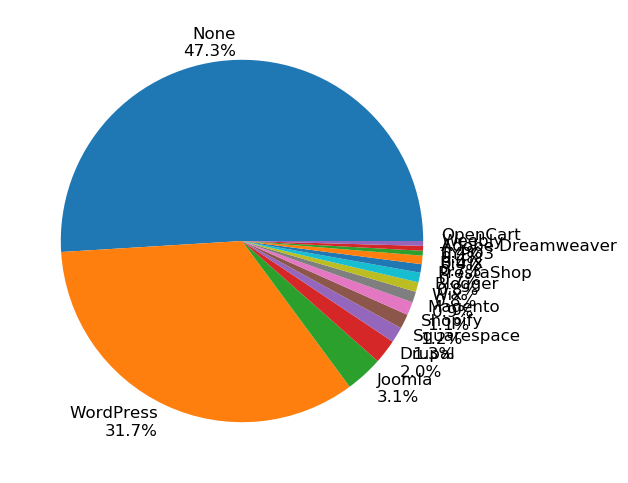

In [8]:
labels = [f'{row.name}\n{row.of_total:.1f}%' for _, row in tbl_shortened.iterrows()]
tbl_shortened['label'] = labels
fig, ax = plt.subplots(figsize=(5, 5), dpi=120)
ax.pie(
    x=tbl_shortened['of_total'],
    labels=tbl_shortened['label']
)
ax.set_aspect(1.0)
None

There are still too many segments... Or are there?

In [9]:
tbl_cms.sort_values(
    'of_total', 
    ascending=False, 
    inplace=True
)

In [10]:
wordpress_blue = '#2f72a5'
grayish = sns.desaturate(wordpress_blue, 0.33)
palette = sns.light_palette(grayish, input="rgb", n_colors=len(tbl_cms), reverse=True)

In [11]:
tbl_cms['color'] = [
    'gray', 
    wordpress_blue
] + palette[2:]
tbl_cms['label'] = [
    {
        'None': 'No CMS', 
        'WordPress': 'WordPress'
    }.get(i, '')
        for i in tbl_cms.index
]
tbl_cms['order'] = [row.of_total if row.name != 'None' else -row.of_total for _, row in tbl_cms.iterrows()]
tbl_cms = tbl_cms.sort_values('order', ascending=False)
tbl_cms.head()

,of_total,of_cms,color,label,order
what,,,,,
WordPress,31.7,60.1,#2f72a5,WordPress,31.7
Joomla,3.1,5.9,"[0.3511271118510297, 0.43633737386926646, 0.50...",,3.1
Drupal,2.0,3.8,"[0.35820337896164756, 0.4425162687790617, 0.50...",,2.0
Squarespace,1.3,2.4,"[0.3652796460722654, 0.4486951636888569, 0.512...",,1.3
Shopify,1.2,2.3,"[0.3723559131828832, 0.45487405859865215, 0.51...",,1.2


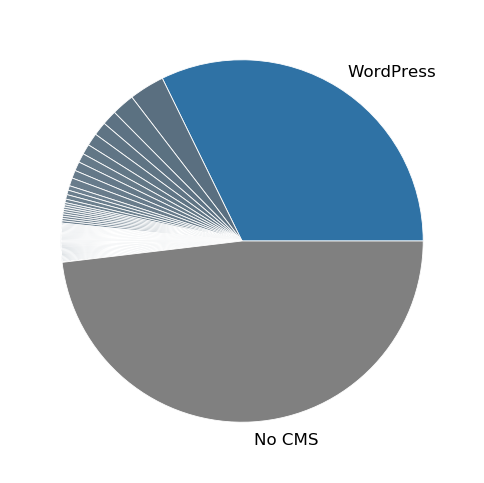

In [12]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=120)
ax.set_aspect(1.0)
patches, texts = ax.pie(
    x=tbl_cms['of_total'],
    labels=tbl_cms['label'],
    colors=tbl_cms['color']
)
for p in patches:
    p.set_linewidth(0.5)
    p.set_edgecolor('white')
None

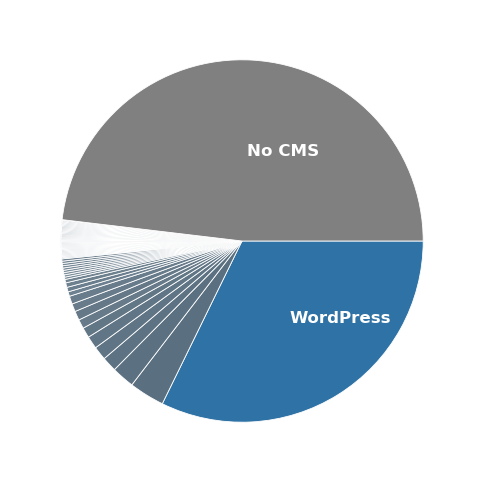

In [13]:
def my_pie(startangle=0, label=True, 
           labeldistance=0.5, counterclock=False
          ):
    fig, ax = plt.subplots(figsize=(5, 5), dpi=120)
    ax.set_aspect(1.0)
    if label:
        labels = tbl_cms['label']
    else:
        labels = None
    patches, texts = ax.pie(
        x=tbl_cms['of_total'],
        labels=labels,
        colors=tbl_cms['color'],
        startangle=startangle,
        labeldistance=labeldistance,
        textprops=dict(color="w", weight='bold'),
        counterclock=counterclock
    )
    for p in patches:
        p.set_linewidth(0.5)
        p.set_edgecolor('white')
    return ax

my_pie()

In [14]:
import ipywidgets as ipw
ipw.interact(my_pie, startangle=(-180, 180), labeldistance=(0, 1.0))

interactive(children=(IntSlider(value=0, description='startangle', max=180, min=-180), Checkbox(value=True, de…

<function __main__.my_pie(startangle=0, label=True, labeldistance=0.5, counterclock=False)>

Text(0.5,1,'WordPress powers 30% of the Web')

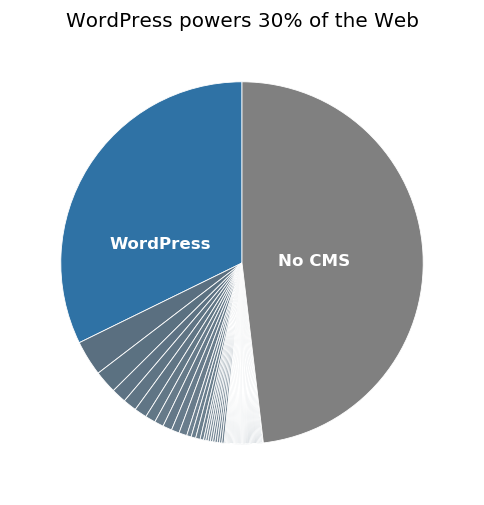

In [15]:
ax = my_pie(startangle=90, labeldistance=0.2, counterclock=True)
ax.set_title('WordPress powers 30% of the Web')

## D. Delete (data-ink ratio & readability)

Delete unneeded elements, improve the readabiilty

In [16]:
pass